## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則話來觀察訓練情形。

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
boston = datasets.load_boston()

In [4]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=4)

# Linear

In [5]:
# 建立一個線性回歸模型
reg = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
reg.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = reg.predict(x_test)

In [7]:
# 預測值與實際值的差距，使用 MSE
print(f"Mean Square Error = {mean_squared_error(y_test, y_pred):.2f}")

# 可以看回歸模型的參數值
print('Coefficients: ', reg.coef_)

Mean Square Error = 17.04
Coefficients:  [-1.25856659e-01  4.84257396e-02  1.84085281e-02  3.08509569e+00
 -1.73277018e+01  3.61674713e+00  2.19181853e-03 -1.49361132e+00
  3.19979200e-01 -1.27294649e-02 -9.27469086e-01  9.50912468e-03
 -5.33592471e-01]


# LASSO

In [8]:
# 建立一個線性回歸模型
lasso = linear_model.Lasso(alpha=1.0)

# 將訓練資料丟進去模型訓練
lasso.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = lasso.predict(x_test)

In [9]:
# 印出各特徵對應的係數，可以看到許多係數都變成 0，Lasso Regression 的確可以做特徵選取
print(lasso.coef_)

[-0.07256057  0.04967103 -0.          0.         -0.          0.80886056
  0.02328171 -0.68444051  0.26862528 -0.01526566 -0.71692899  0.00828412
 -0.77123108]


In [11]:
# 預測值與實際值的差距，使用 MSE
print(f"Mean Square Error = {mean_squared_error(y_test, y_pred):.2f}")

Mean Square Error = 23.24


# Ridge

In [12]:
# 建立一個線性回歸模型
ridge = linear_model.Ridge(alpha=1.0)

# 將訓練資料丟進去模型訓練
ridge.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = ridge.predict(x_test)

In [13]:
# 印出 Ridge 的參數，可以很明顯看到比起 Linear Regression，參數的數值差不多，
print(ridge.coef_)

[-1.22488037e-01  4.95483049e-02 -1.15839833e-02  2.89071820e+00
 -1.00402895e+01  3.66674306e+00 -4.43653915e-03 -1.38990862e+00
  3.02286292e-01 -1.32259798e-02 -8.52141794e-01  9.86708353e-03
 -5.43681130e-01]


In [14]:
# 預測值與實際值的差距，使用 MSE
print(f"Mean Square Error = {mean_squared_error(y_test, y_pred):.2f}")

Mean Square Error = 17.35


同樣的資料集，使用 LASSO 與 Ridge 不見得比單純的線性回歸模型好

分割訓練資料集的test size 使用越大，MSE 也越大

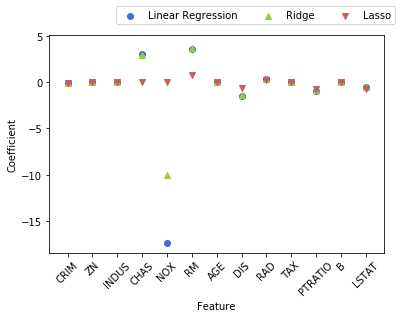

In [17]:
plt.scatter(range(len(reg.coef_)), reg.coef_, marker='o', color='royalblue', label='Linear Regression')
plt.scatter(range(len(reg.coef_)), ridge.coef_, marker='^', color='yellowgreen', label='Ridge')
plt.scatter(range(len(reg.coef_)), lasso.coef_, marker='v', color='indianred', label='Lasso')
plt.xticks(range(len(boston.feature_names)), boston.feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.legend(loc=(0.2, 1.05), ncol=3)